## Гео-данные и картограммы

#### Задание: объекты культурного наследия России

Изучите набор данных по объектам культурного наследия России (в виде gz-архива): \
https://video.ittensive.com/python-advanced/data-44-structure-4.csv.gz \
и постройте фоновую картограмму по количеству объектов в каждом регионе России, используя гео-данные \
https://video.ittensive.com/python-advanced/russia.json

Выведите для каждого региона количество объектов в нем. \
Посчитайте число объектов культурного наследия в Татарстане. \
Чему равно число объектов культурного наследия в Алтайском крае?

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import descartes

In [7]:
# разведка данных
# df = pd.read_csv('https://video.ittensive.com/python-advanced/data-44-structure-4.csv.gz', compression='gzip')
# cols = df.columns

# Выделяем нужные колонки прямо при чтении данных
cols = ['Объект', 'Номер в реестре', 'Полный адрес', 'На карте', 'Id', 'Регион', 'учетный номер', 'Id.1','Категория историко-культурного значения', 
    'Принадлежность к Юнеско', 'Особо ценный объект', 'идентификатор ансамбля', 'дата создания']
df = pd.read_csv('https://video.ittensive.com/python-advanced/data-44-structure-4.csv.gz', compression='gzip', usecols=cols)
cult = df.loc[:, df.columns.isin(cols)]
cult.columns = ['Объект', 'Р.Номер', 'Адрес','Коорд', 'Id', 'Регион', 'Уч.номер', 'Id.1',
    'Категория','Юнеско', 'Особо_ценный', 'Ансамбль',  'Создан']
cult['Регион'] = cult['Регион'].str.upper()
cult.head()

C:\Users\Sovtsov\AppData\Local\Temp\ipykernel_4368\1413818111.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://video.ittensive.com/python-advanced/data-44-structure-4.csv.gz', compression='gzip', usecols=cols)


,Объект,Р.Номер,Адрес,Коорд,Id,Регион,Уч.номер,Id.1,Категория,Юнеско,Особо_ценный,Ансамбль,Создан
0,Магазин Трубицина,231410038780005,"Алтайский край, г.Барнаул, район Центральный, ...","{""type"":""Point"",""coordinates"":[53.332705052623...",22,АЛТАЙСКИЙ КРАЙ,22-2401,2,Регионального значения,нет,нет,NaN,нач. XX в.
1,Дом Татарниковой (деревянный),231410037170005,"Алтайский край, г.Бийск, ул. Л.Толстого, 101","{""type"":""Point"",""coordinates"":[52.549928514876...",22,АЛТАЙСКИЙ КРАЙ,22-2434,2,Регионального значения,нет,нет,NaN,1911 г.
2,Колокольня (деревянная),101410036630006,"Республика Карелия, Медвежьегорский р-н, о.Кижи","{""type"":""Point"",""coordinates"":[62.067588210934...",10,РЕСПУБЛИКА КАРЕЛИЯ,10-619,1,Федерального значения,да,да,NaN,XVIII в.
3,Образец городского административного здания,481410031550005,"Курганская область, город Курган, улица Куйбыш...","{""type"":""Point"",""coordinates"":[55.440982396671...",45,КУРГАНСКАЯ ОБЛАСТЬ,45-2933,4,Местного (муниципального) значения,нет,нет,NaN,1890г.
4,Тобольские ворота Омской крепости,581410032070006,"Омская область, г.Омск, Набережная Тухачевского","{""type"":""Point"",""coordinates"":[54.987739999999...",55,ОМСКАЯ ОБЛАСТЬ,55-3930,1,Федерального значения,нет,нет,NaN,1792 г.


In [8]:
# Количество объектов по регинам
byregion = cult.groupby('Регион')['Объект'].count()  #, as_index=False
byregion

Регион
АЛТАЙСКИЙ КРАЙ                     4480
АМУРСКАЯ ОБЛАСТЬ                    636
АРХАНГЕЛЬСКАЯ ОБЛАСТЬ              1958
АСТРАХАНСКАЯ ОБЛАСТЬ                901
БЕЛГОРОДСКАЯ ОБЛАСТЬ               2155
                                   ... 
ЧЕЧЕНСКАЯ РЕСПУБЛИКА                614
ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ      674
ЧУКОТСКИЙ АВТОНОМНЫЙ ОКРУГ           80
ЯМАЛО-НЕНЕЦКИЙ АВТОНОМНЫЙ ОКРУГ      46
ЯРОСЛАВСКАЯ ОБЛАСТЬ                1158
Name: Объект, Length: 85, dtype: int64

In [9]:
# Чтение карты России

mapd = gpd.read_file("https://video.ittensive.com/python-advanced/russia.json")
mapd = mapd.to_crs({"init":'epsg:3857'})
# mapd.head()


C:\Users\Sovtsov\AppData\Local\Programs\Python\Python39\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [10]:

#! проверим, все ли названия регионов в верхнем регистре

# mapd['reg'] = mapd['NL_NAME_1'].str.upper()
# mapd[mapd['reg'] != mapd['NL_NAME_1']]    

# нашлось 3, исправляем

mapd['NL_NAME_1'] = mapd['NL_NAME_1'].str.upper()

print(mapd.shape)
data = pd.merge(left=mapd, right=byregion,
               left_on="NL_NAME_1", right_on="Регион", how="left")

print(data.shape)  # контроль корректности слияния

#! проверим, не было ли разных названий одинаковых регионов в byregion и mapd
# print(data[data["Объект"].isnull()])
"""
ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ   
10   186  RUS  Russia     1         Adygey                  РЕСПУБЛИКА АДЫГЕЯ   
22   186  RUS  Russia    15        Chuvash               ЧУВАШСКАЯ РЕСПУБЛИКА   
37   186  RUS  Russia    46       Mariy-El                РЕСПУБЛИКА МАРИЙ-ЭЛ   
44   186  RUS  Russia    53  North Ossetia         РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ   
63   186  RUS  Russia    73      Tatarstan               РЕСПУБЛИКА ТАТАРСТАН
"""
# byregion.index
# ...
# Исправляем несоответствие и повторяем слияние

mapd = mapd.replace({
    "ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ": "ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА",
    "РЕСПУБЛИКА АДЫГЕЯ": "РЕСПУБЛИКА АДЫГЕЯ (АДЫГЕЯ)",
    "ЧУВАШСКАЯ РЕСПУБЛИКА": "ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ",
    "РЕСПУБЛИКА МАРИЙ-ЭЛ": "РЕСПУБЛИКА МАРИЙ ЭЛ",
    "РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ": "РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ",
    "РЕСПУБЛИКА ТАТАРСТАН": "РЕСПУБЛИКА ТАТАРСТАН (ТАТАРСТАН)"
})
# повторяем объединение и делаем контрольную проверку
print(mapd.shape)
data = pd.merge(left=mapd, right=byregion,
               left_on="NL_NAME_1", right_on="Регион", how="left")

print(data.shape)  # контроль корректности слияния
# print(data[data["Объект"].isnull()])


(85, 10)
(85, 11)
(85, 10)
(85, 11)


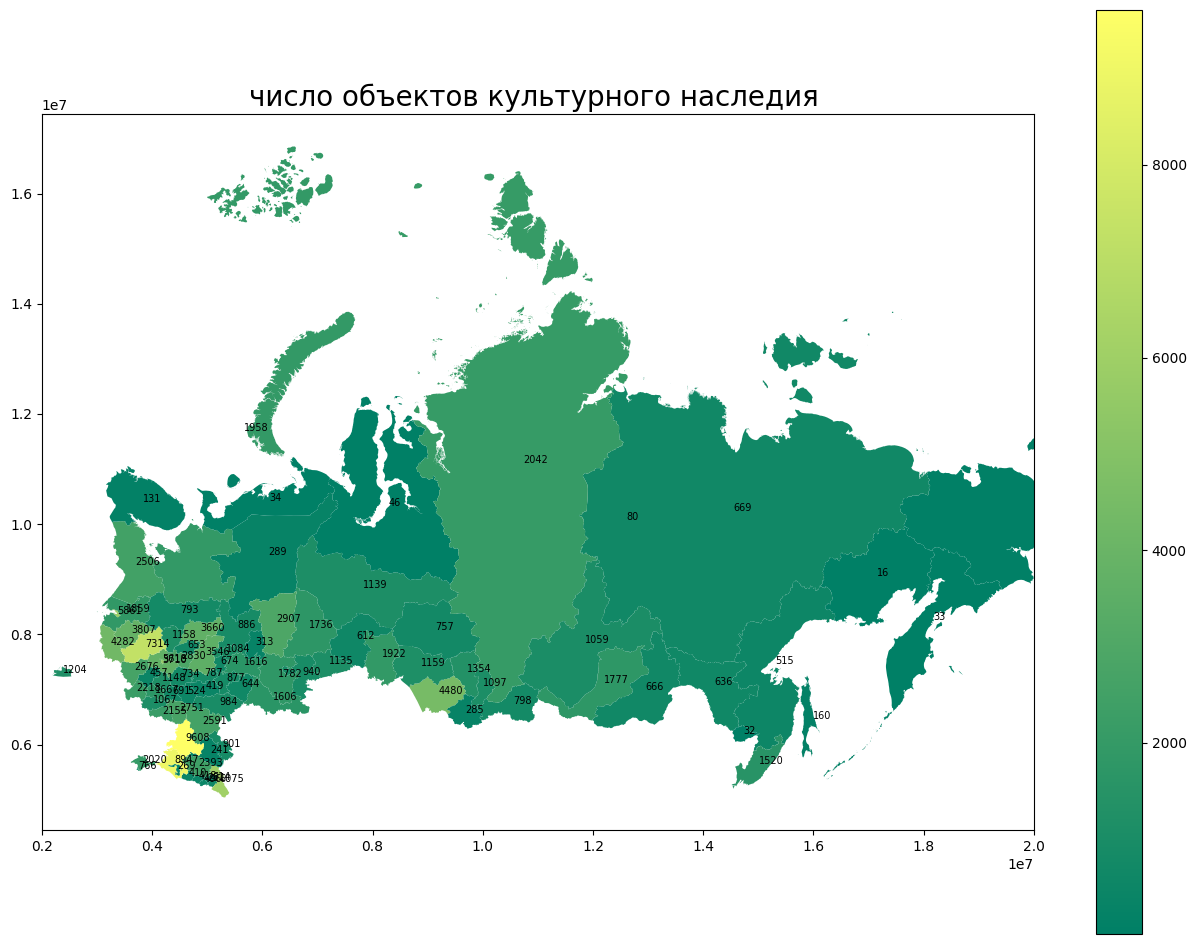

In [11]:
# Карта наличия культурных объектов

fig = plt.figure(figsize=(16,12))
area = plt.subplot(1, 1, 1)
data.plot(ax=area, legend=True, column="Объект", cmap="summer")
plt.title("число объектов культурного наследия ", fontsize=20)
#! ограничим область для показа на карте
area.set_xlim(2e6, 2e7)
#--
for _, region in data.iterrows():
    area.annotate(region["Объект"],
                 xy=(region.geometry.centroid.x,
                    region.geometry.centroid.y), fontsize=7)
plt.show()

In [14]:
# cult[cult['Регион'].str.contains('ТАТАРСТАН')]

print("Чему равно число объектов культурного наследия:")
print(f"РЕСПУБЛИКА ТАТАРСТАН (ТАТАРСТАН): {byregion['РЕСПУБЛИКА ТАТАРСТАН (ТАТАРСТАН)']}")
print(f"АЛТАЙСКИЙ КРАЙ: {byregion['АЛТАЙСКИЙ КРАЙ']}")


Чему равно число объектов культурного наследия:
РЕСПУБЛИКА ТАТАРСТАН (ТАТАРСТАН): 1616
АЛТАЙСКИЙ КРАЙ: 4480
